# **5.01 カラー画像（cifar10）の学習**

# 【データの準備と確認】

リスト5-1（リストA）

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=07fa4289d6c31b58991608409a272634acd0fe4b1d5d3b06baecd343baa3a845
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト5-2

In [2]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

170498071/170498071 [==============================] - 3s 0us/step
学習データ（問題画像）　：(50000, 32, 32, 3)
テストデータ（問題画像）：(10000, 32, 32, 3)


リスト5-3

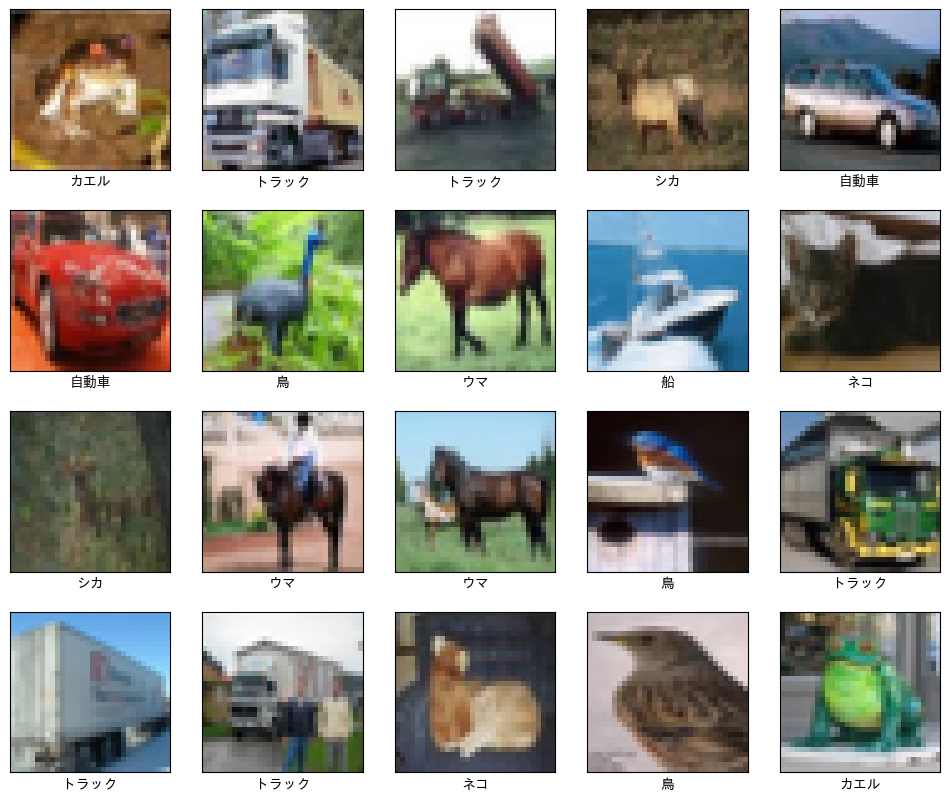

In [3]:
class_names = ["飛行機", "自動車", "鳥", "ネコ", "シカ",
               "イヌ", "カエル", "ウマ", "船", "トラック"]
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(class_names[ydata[i][0]])
    plt.show()

disp_data(x_train, y_train)

リスト5-4

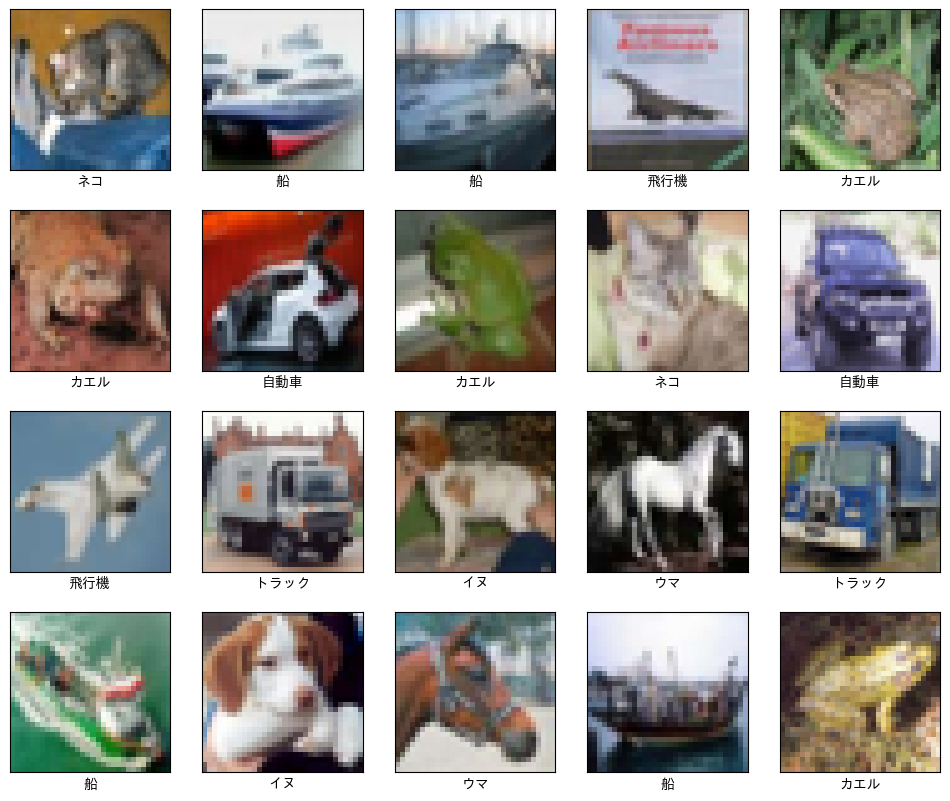

In [4]:
disp_data(x_test, y_test)

# 【モデルを作って学習】

リスト5-5

In [5]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


リスト5-6（リストB’）

In [6]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20, #20
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 1.8995 - accuracy: 0.3192 - val_loss: 1.7640 - val_accuracy: 0.3651
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7447 - accuracy: 0.3756 - val_loss: 1.7112 - val_accuracy: 0.3743
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6875 - accuracy: 0.3969 - val_loss: 1.6341 - val_accuracy: 0.4172
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6562 - accuracy: 0.4058 - val_loss: 1.6361 - val_accuracy: 0.4143
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6354 - accuracy: 0.4157 - val_loss: 1.6416 - val_accuracy: 0.4062
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6198 - accuracy: 0.4213 - val_loss: 1.6524 - val_accuracy: 0.4041
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6108 - accuracy: 0.4246 - val_loss: 1.6283 - val_accuracy

リスト5-7：（リストC）

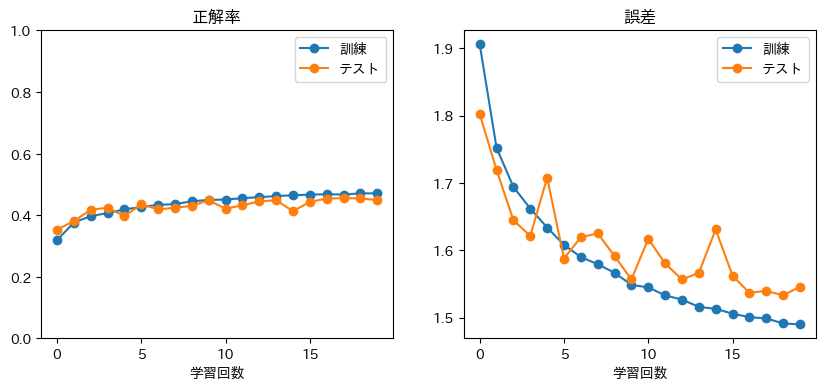

In [ ]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト5-8

313/313 [==============================] - 1s 2ms/step


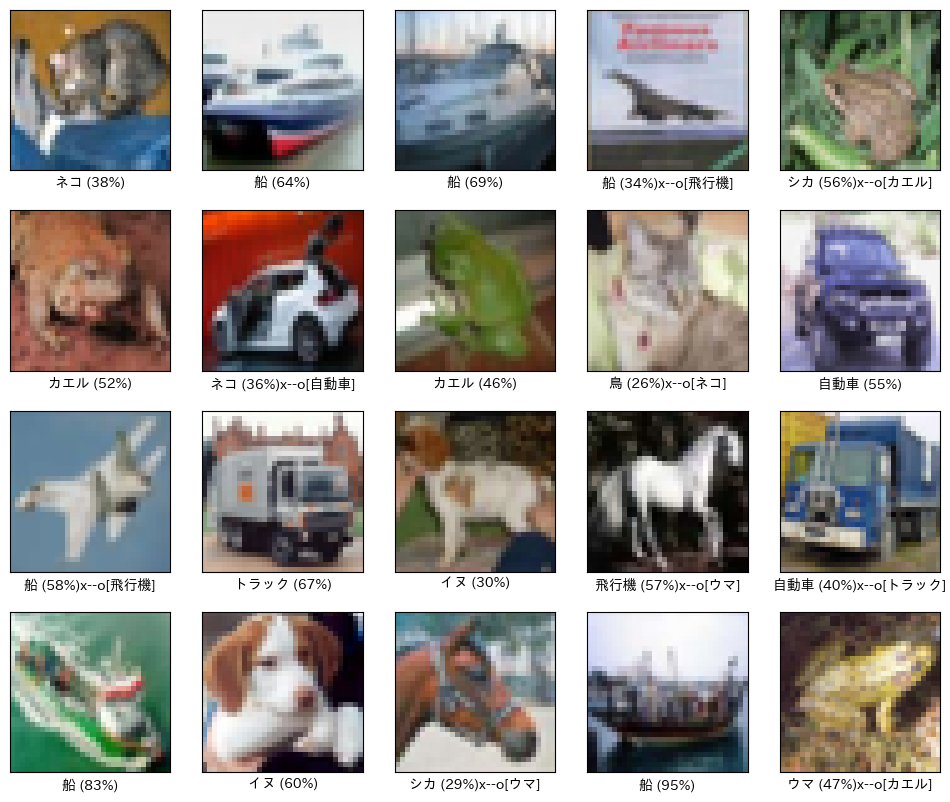

In [ ]:
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i][0]]+"]"
    lbl = f"{class_names[index]} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()